In [6]:
import pandas as pd

# Load the dataset
data = pd.read_excel('Nike_Sales_Data.xlsx')

print(data.head())


  Invoice Date                    Product     Region     Retailer  \
0   2020-01-01      Men's Street Footwear  Northeast  Foot Locker   
1   2020-01-02    Men's Athletic Footwear  Northeast  Foot Locker   
2   2020-01-03    Women's Street Footwear  Northeast  Foot Locker   
3   2020-01-04  Women's Athletic Footwear  Northeast  Foot Locker   
4   2020-01-05              Men's Apparel  Northeast  Foot Locker   

  Sales Method     State  Price per Unit  Total Sales  Units Sold  
0     In-store  New York              50         6000         120  
1     In-store  New York              50         5000         100  
2     In-store  New York              40         4000         100  
3     In-store  New York              45         3825          85  
4     In-store  New York              60         5400          90  


In [7]:
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])


In [8]:
sales_data = data.groupby('Invoice Date')['Total Sales'].sum().reset_index()
sales_data = sales_data.rename(columns={'Invoice Date': 'Date', 'Total Sales': 'Sales'})
print(sales_data.head())


        Date  Sales
0 2020-01-01   8452
1 2020-01-02   6894
2 2020-01-03   6325
3 2020-01-04   6150
4 2020-01-05   7079


In [9]:
sales_data = sales_data.sort_values(by='Date')


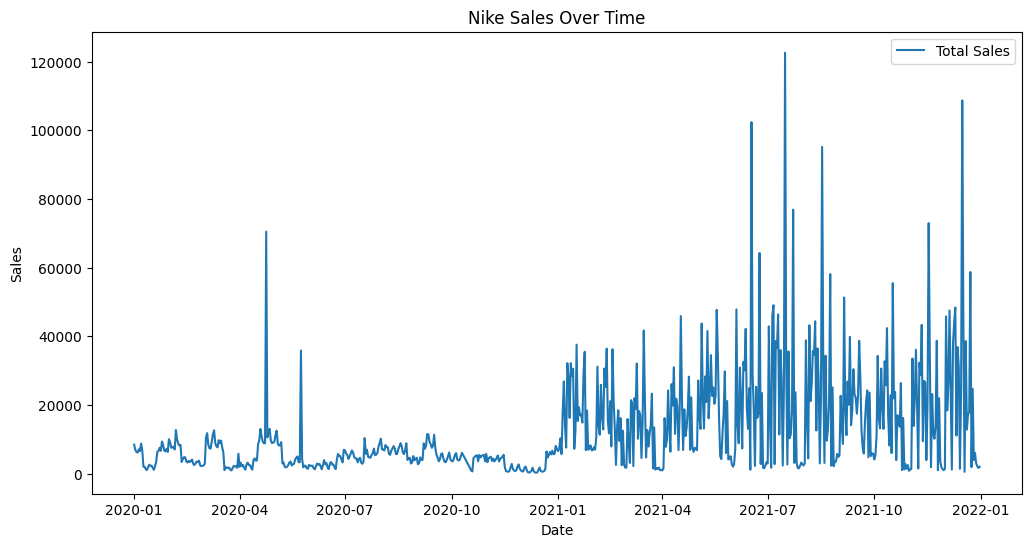

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(sales_data['Date'], sales_data['Sales'], label='Total Sales')
plt.title('Nike Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


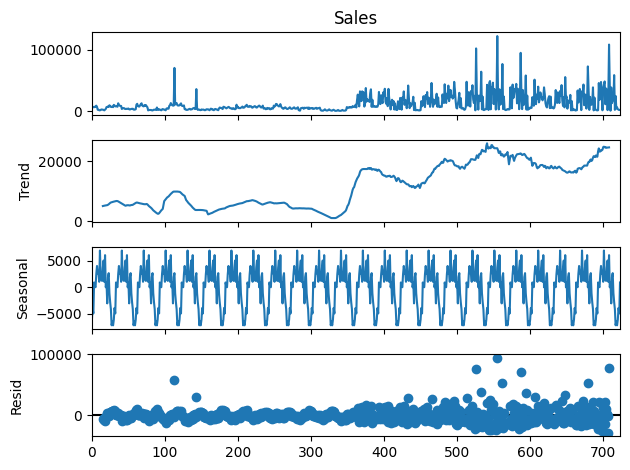

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(sales_data['Sales'], model='additive', period=30)
result.plot()
plt.show()


In [12]:
!pip install statsmodels


In [13]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model
model = ARIMA(sales_data['Sales'], order=(5, 1, 0))
arima_model = model.fit()

# Forecast the next 30 days
forecast = arima_model.forecast(steps=30)
print(forecast)


724    2709.292346
725    3089.671490
726    2488.899785
727    2390.412959
728    2454.399832
729    2472.854559
730    2517.558409
731    2611.445429
732    2508.376155
733    2482.439400
734    2515.648303
735    2519.922513
736    2508.578819
737    2530.777372
738    2517.651097
739    2508.390401
740    2516.397751
741    2519.697010
742    2513.741446
743    2517.920805
744    2517.580393
745    2514.868588
746    2516.004116
747    2517.544052
748    2515.876154
749    2516.343374
750    2516.815745
751    2516.219280
752    2516.187682
753    2516.696201
Name: predicted_mean, dtype: float64


Root Mean Squared Error: 32231.55052801533


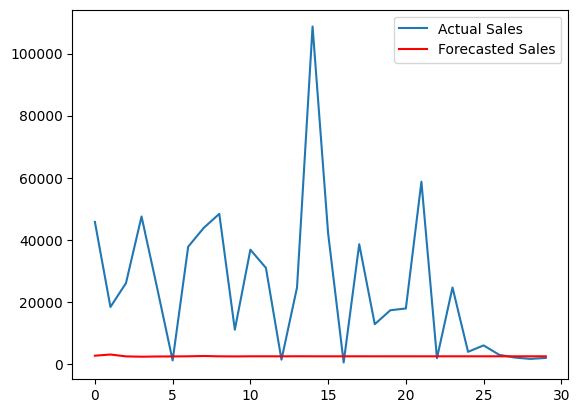

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error

test = sales_data['Sales'][-30:]  # Last 30 days of sales
rmse = np.sqrt(mean_squared_error(test, forecast[:30]))
print("Root Mean Squared Error:", rmse)

#actual vs forecasted sales
plt.plot(range(len(test)), test, label='Actual Sales')
plt.plot(range(len(test)), forecast[:30], label='Forecasted Sales', color='red')
plt.legend()
plt.show()


In [15]:
!pip install prophet


In [16]:
prophet_data = sales_data.rename(columns={'Date': 'ds', 'Sales': 'y'})


In [17]:
from prophet import Prophet

model = Prophet()
model.fit(prophet_data)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmafpki3m/kat1rmv2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmafpki3m/vy12zmf5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90696', 'data', 'file=/tmp/tmpmafpki3m/kat1rmv2.json', 'init=/tmp/tmpmafpki3m/vy12zmf5.json', 'output', 'file=/tmp/tmpmafpki3m/prophet_model8ysughwt/prophet_model-20241123094232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:42:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:42:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


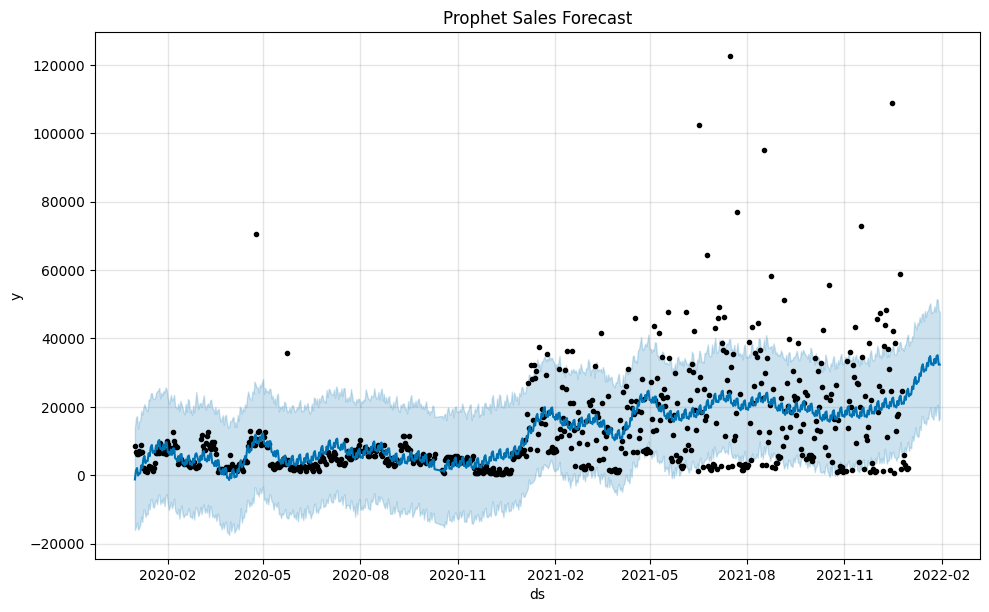

In [18]:
# Create a future dataframe
future = model.make_future_dataframe(periods=30)  # Forecast next 30 days
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Prophet Sales Forecast')
plt.show()


In [19]:
forecast[['ds', 'yhat']].to_csv('Nike_Sales_Forecast.csv', index=False)
